In [1]:
import math
import copy
import statistics
import numpy as np
import Parsing_midi as pm
import Init_chromo as init
import mido
import matplotlib.pyplot as plt
from mido import Message, MidiFile, MidiTrack
from collections import Counter

In [2]:
midi_list = pm.get_midi('MidiSample/sky.mid', 0)
note_msg, midi_msg = pm.separate_song(midi_list, 15360)
m = midi_msg[1]
ori = pm.to_midi_file(m, 8 , 'ori.mid')

In [3]:
## try 
manual = pm.get_midi('MidiSample/manual.mid', 0)
ori = pm.get_midi('MidiSample/ori.mid', 0)
ㄎ
def plot_contour(midi_msg):
    t = 0; note = []         
    for i in range(len(midi_msg)):
        if i% 2 == 0:
            t += (midi_msg[i].time + midi_msg[i+1].time)
            note.append([midi_msg[i].note, t])
    x = [i[1] for i in note]
    y = [i[0] for i in note]
    plt.plot(x, y, linewidth=2.0)
    return x, y, note

In [4]:
# 校正頭尾
def correct_xy(xy1, xy2):
    if xy1[0][1] < xy2[0][1]:
        xy2[0][1] = xy1[0][1]
    else:
        xy1[0][1] = xy2[0][1]

    if xy1[-1][1] < xy2[-1][1]:
        xy2[-1][1] = xy1[-1][1]
    else:
        xy1[-1][1] = xy2[-1][1]
    return xy1, xy2

# 梯形面積
def area(xy):
    area_sum1 = 0
    for i in range(len(xy) - 1):
        area_sum1 += (((xy[i][0] + xy[i+1][0]) * (abs(xy[i][1] - xy[i+1][1]))) / 2)
    return area_sum1

In [5]:
def smooth(original_midi, note_list):  # sliding window = 2
    temp = []
    for i in range(len(note_list)):
        if i < 2:
            temp.append(note_list[i])
        elif i > len(note_list) - 2:
            temp.append(note_list[i])
#         if i > 1 and i < len(note_list) - 1 :
        else:
            median = statistics.median(note_list[i-1:i+2])
            temp.append(median)
                   
    m = copy.deepcopy(original_midi)
    for i in range(len(temp)):
        if i % 2 == 0:
            m[i*2].note = temp[i]
        else: 
            m[i].note = m[i-1].note            
    return m

7380.5


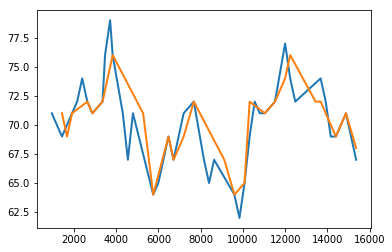

In [6]:
# 尚未smooth前面積差
x1, y1, note1 = plot_contour(manual)
x2, y2, note2 = plot_contour(ori)
xy1, xy2 = correct_xy(note1, note2)
a1 = area(xy1)
a2 = area(xy2)
print(abs(a1 - a2))

3420.5


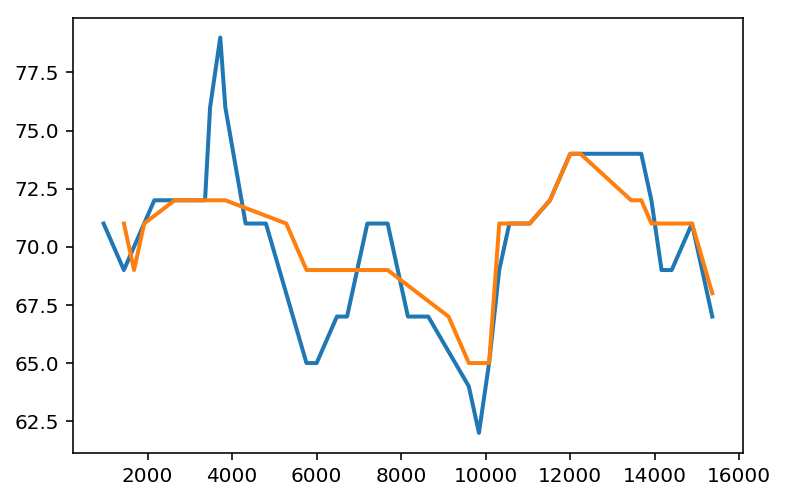

In [8]:
# smooth 後面積差
smooth_ori = smooth(ori, y2)
smooth_try = smooth(manual, y1)

x, y, z = plot_contour(smooth_try)
x1, y1, z1 = plot_contour(smooth_ori)
xy1, xy2 = correct_xy(z, z1)
a1 = area(xy1)
a2 = area(xy2)
print(abs(a1 - a2))